# PS-DTFE Julia

In [1]:
using JLD, Plots, Revise
includet("density.jl")

# Set up box
Ni = 256
L = 25.
m = (L / Ni) ^ 2
rangeX = -0.05 * L : L / (8. * Ni) : 0.05 * L

# Load data
positions_initial = load("data/positions_initial.jld", "data")
positions = load("data/positions.jld", "data")
velocities = load("data/velocities.jld", "data")

nothing

In [2]:
# Evaluate density estimator
box = [-L  L; -L L]
depth = 10

estimator = PS_DTFE(positions_initial, positions, velocities, m, depth, box)

p = [0., 0.] 

println("density: ", density(p, estimator))
println("velocity: ", v(p, estimator))
println("number of streams: ", numberOfStreams(p, estimator))

density: 376.8054437094147
velocity: [9.240223547772283 -182.06197057407758; -72.0335493878694 -157.47626126799045; -60.474397364992086 -201.50986095424116; -138.62865408956623 -44.1477038965086; -14.138369384522669 -301.9810681244974; -36.73959929910353 -286.39366328864867; 289.8822413428503 -357.03133643369085; -361.60331438499003 -211.0732124148023; -228.9301808120048 -232.9264361575794; -272.2201131180021 -316.5804686336685; -121.99349473603232 -200.93935833358216; 11.208161074960993 -183.21398691078133; 180.52646213439408 -236.49470804961538; -45.856080032833205 -282.3786059728758; -76.31262965791916 -263.7011204791138; -22.066400986263922 -293.8119250624257; 136.05348771889575 -335.52504419270235; -181.22647876713398 -125.43171772848747; 67.58881779603668 -152.41118231995856; -15.500493775611671 -106.90628300022166; 60.51504965444644 -314.39639464917957; -106.65684008836553 -264.6739019789921; -191.8725465776139 -237.21329723416608; -68.13956456018481 -87.63669163380597; -44.8917

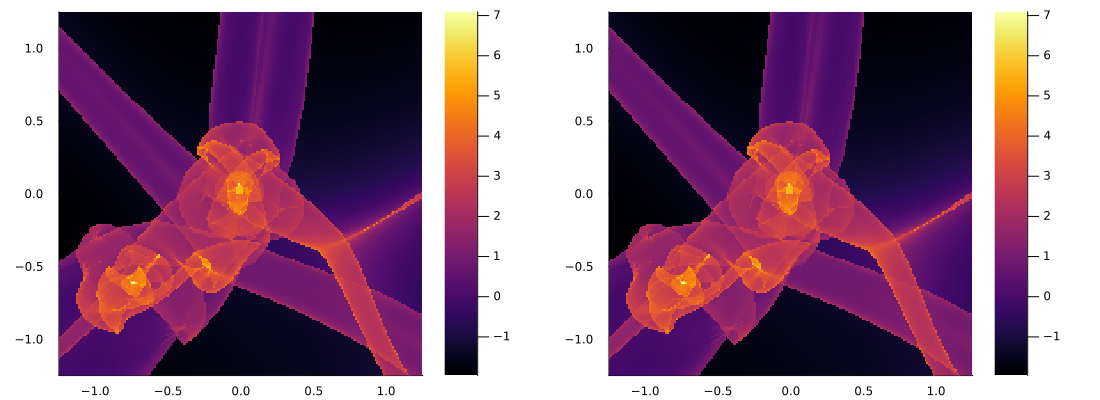

In [5]:
density(estimator, range) = [density([x, y], estimator) for y in range, x in range]
numberOfStreams(estimator, range) = [density([x, y], estimator) for y in range, x in range]

rho = density(estimator, rangeX)
number = numberOfStreams(estimator, rangeX)

write("data/density_PS-DTFE.bin", rho)
write("data/number_PS-DTFE.bin", number)

pl1 = heatmap(rangeX, rangeX, log.(rho), aspect_ratio=:equal, xlims=(-0.05 * L, 0.05 * L), ylims=(-0.05 * L, 0.05 * L))
pl2 = heatmap(rangeX, rangeX, log.(number), aspect_ratio=:equal, xlims=(-0.05 * L, 0.05 * L), ylims=(-0.05 * L, 0.05 * L))

plot(pl1, pl2, layout = grid(1, 2), size=(1100, 400))